⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛
# **Remaining Battery Life Prediction Using Different ML Models**
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

# **About Dataset**
**Cycle_Index**: This column likely represents the index or number assigned to each cycle in the dataset. Each cycle may correspond to a complete charging and discharging process of the battery.

**Discharge Time (s)**: This column records the duration of the discharge process for each cycle, measured in seconds. It indicates how long it takes for the battery to deplete its stored energy.

**Decrement 3.6-3.4V (s)**: This column measures the time it takes for the battery voltage to drop from 3.6 volts to 3.4 volts during the discharge process. It may provide insights into the rate of discharge.

**Max. Voltage Dischar. (V)**: This column records the maximum voltage observed during the discharge process for each cycle, measured in volts. It reflects the peak voltage output of the battery during discharge.

**Min. Voltage Charg. (V)**: This column represents the minimum voltage observed during the charging process for each cycle, measured in volts. It indicates the lowest voltage level reached during charging.

**Time at 4.15V (s)**: This column indicates the duration the battery spends at a voltage level of 4.15 volts during the charging process. It may be a specific voltage level targeted during charging.

**Time constant current (s)**: This column likely refers to the time constant for the current in the battery system, measured in seconds. It may provide information about the rate at which the current changes over time.

**Charging time (s)**: This column records the total time taken for the charging process to complete for each cycle, measured in seconds. It represents the duration required to replenish the battery's energy.

**RUL (Remaining Useful Life)**: This column may contain information about the remaining useful life of the battery or energy storage system. It could be an estimate of how much longer the battery is expected to function effectively based on its current performance characteristics.


# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import time

In [ ]:
df = pd.read_csv('/content/Battery_RUL.csv')
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


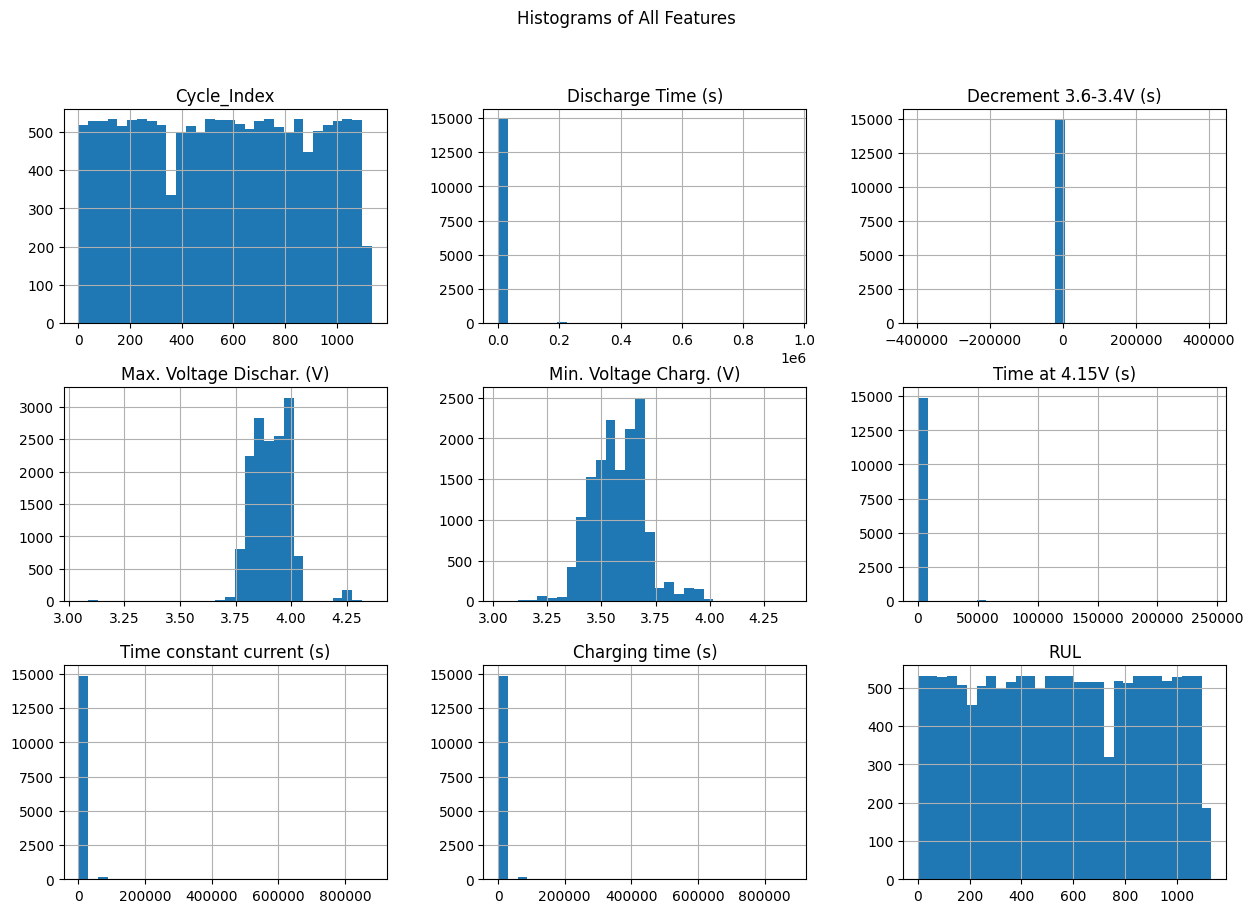

In [ ]:
df.hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of All Features')
plt.show()

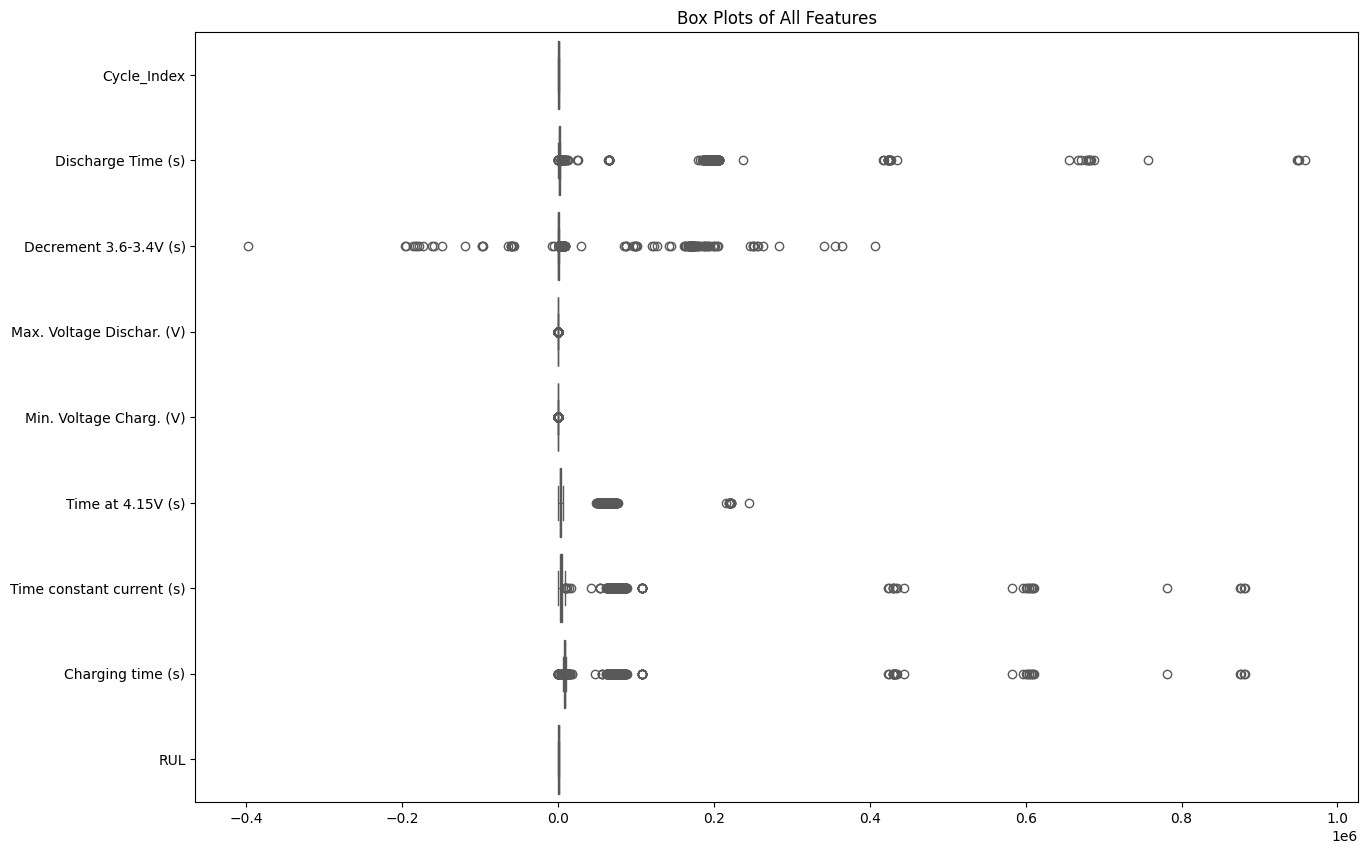

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title('Box Plots of All Features')
plt.show()

<ipython-input-12-88e5c37a0f4b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Cycle_Index_Binned', y=column, palette='Set3')
<ipython-input-12-88e5c37a0f4b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Cycle_Index_Binned', y=column, palette='Set3')
<ipython-input-12-88e5c37a0f4b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Cycle_Index_Binned', y=column, palette='Set3')
<ipython-input-12-88e5c37a0f4b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

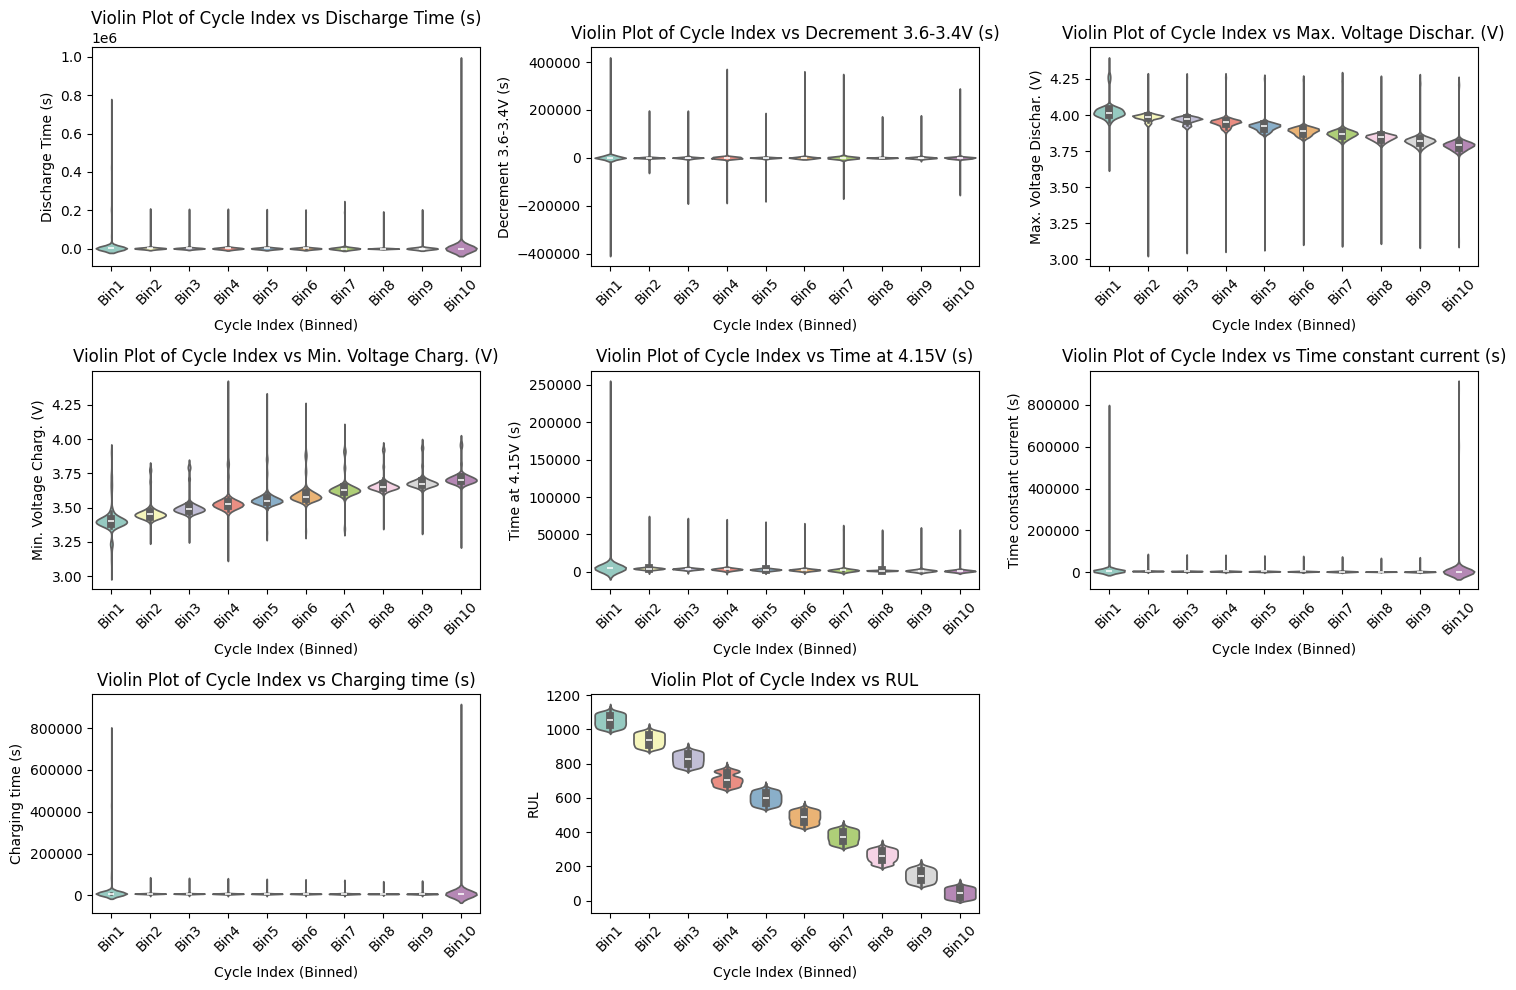

In [ ]:
# Binning the Cycle_Index
df['Cycle_Index_Binned'] = pd.cut(df['Cycle_Index'], bins=10, labels=[f'Bin{i}' for i in range(1, 11)])

# Violin Plot for each feature against the binned Cycle Index
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[1:-1], 1):  # Skipping the first and last columns
    plt.subplot(3, 3, i)
    sns.violinplot(data=df, x='Cycle_Index_Binned', y=column, palette='Set3')
    plt.title(f'Violin Plot of Cycle Index vs {column}')
    plt.xlabel('Cycle Index (Binned)')
    plt.ylabel(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

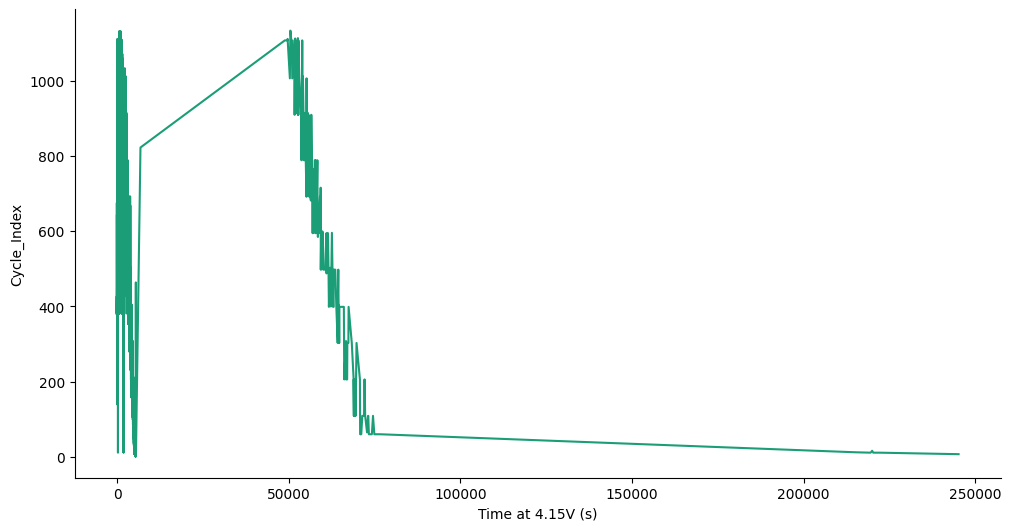

In [ ]:
# @title Time at 4.15V (s) vs Cycle_Index

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time at 4.15V (s)']
  ys = series['Cycle_Index']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Time at 4.15V (s)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time at 4.15V (s)')
_ = plt.ylabel('Cycle_Index')

In [ ]:
# Plot Decrement 3.6-3.4V (s) vs Cycle Index
plt.figure(figsize=(10, 6))
plt.plot(data['Cycle_Index'], data['Decrement 3.6-3.4V (s)'], c='blue')
plt.xlabel('Cycle Index')
plt.ylabel('Decrement 3.6-3.4V (s)')
plt.title('Decrement 3.6-3.4V (s) vs Cycle Index')
plt.grid(True)
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Cycle Index vs RUL')

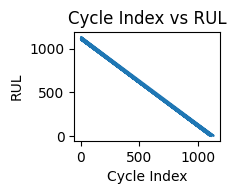

In [ ]:
plt.subplot(3, 3, 1)
plt.plot(df['Cycle_Index'], df['RUL'])
plt.xlabel('Cycle Index')
plt.ylabel('RUL')
plt.title('Cycle Index vs RUL')

# **Exploratory Data Analysis (EDA)**

EDA stands for Exploratory Data Analysis. It's an approach to analyzing data sets to summarize their main characteristics, often using visual methods. In EDA, you typically look at the distribution of data, identify patterns, trends, anomalitis, and relationships between variables.
In this dataset there are 9 columns and 15064 rows.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [ ]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


# **Data Representation**

This histogram tells us how long machines are expected to keep working before they fail. By looking at this chart, we can plan when to perform maintenance to keep them running smoothly and avoid unexpected breakdowns, which saves money and time.

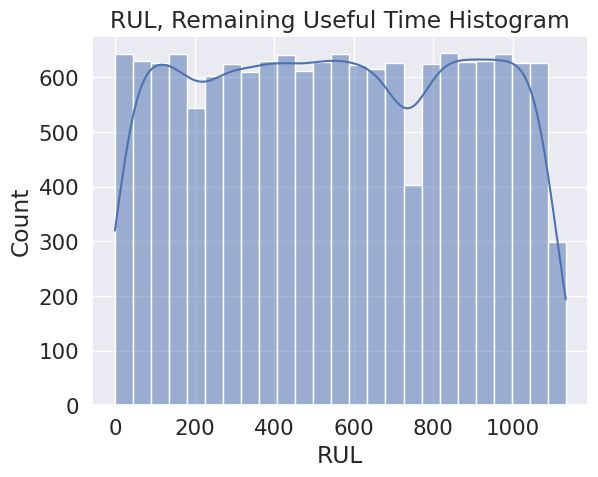

In [ ]:
plt.title('RUL, Remaining Useful Time Histogram')
sns.histplot(df.RUL, kde=True)
plt.show()

In [ ]:
df.columns

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

In [ ]:
target = df['RUL']
features = df.drop(['RUL'], axis=1)
print("Shape of target: ",target.shape)
print("Shape of features: ",features.shape)

Shape of target:  (15064,)
Shape of features:  (15064, 8)


In [ ]:
features = features.drop(['Cycle_Index'], axis=1)
features.shape

(15064, 7)

# **Correration Matrix**

Correlation matrix helps us understand how different variables in our dataset relate to each other. We use libraries like pandas and seaborn to create it. With pandas, we can calculate correlation coefficients between pairs of numerical columns. Seaborn helps us visualize this matrix as a heatmap, where colors indicate the strength and direction of relationships between variables. Lighter colors show stronger positive relationships, while darker colors represent stronger negative relationships. By looking at this matrix, we can see which variables are closely related and which ones are not, helping us understand the data better and make informed decisions.

In [ ]:
corrmat = df.corr()
corrmat

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
Cycle_Index,1.000000,-0.011925,-0.012090,-0.782859,0.759850,-0.176486,-0.040622,-0.018305,-0.999756
Discharge Time (s),-0.011925,1.000000,0.444984,0.349161,-0.239410,0.776720,0.912536,0.935544,0.011957
Decrement 3.6-3.4V (s),-0.012090,0.444984,1.000000,0.199470,-0.132765,0.477091,0.343228,0.371610,0.011998
Max. Voltage Dischar. (V),-0.782859,0.349161,0.199470,1.000000,-0.718182,0.446070,0.286886,0.269009,0.782800
Min. Voltage Charg. (V),0.759850,-0.239410,-0.132765,-0.718182,1.000000,-0.344098,-0.216840,-0.200423,-0.759805
Time at 4.15V (s),-0.176486,0.776720,0.477091,0.446070,-0.344098,1.000000,0.568922,0.676859,0.176514
Time constant current (s),-0.040622,0.912536,0.343228,0.286886,-0.216840,0.568922,1.000000,0.953522,0.040675
Charging time (s),-0.018305,0.935544,0.371610,0.269009,-0.200423,0.676859,0.953522,1.000000,0.018299
RUL,-0.999756,0.011957,0.011998,0.782800,-0.759805,0.176514,0.040675,0.018299,1.000000


k is the number of top features with the highest correlation with the 'RUL' column that you want to include in the heatmap.
We extract the k columns with the highest correlation with 'RUL' from the correlation matrix and compute the correlation matrix for these selected columns.


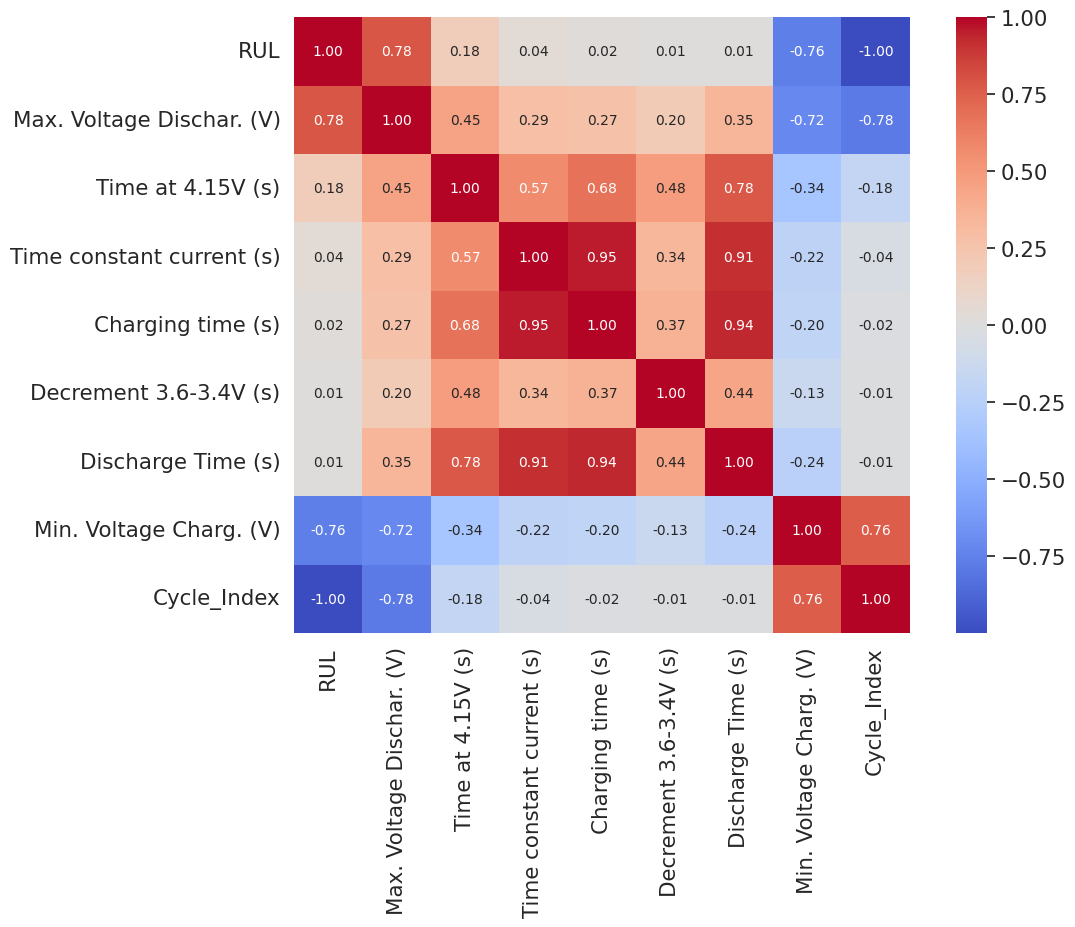

In [ ]:
plt.figure(figsize=(12, 8))
k=9
cols = corrmat.nlargest(k, 'RUL')['RUL'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.4)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values,cmap="coolwarm")
plt.show()

# **Standardization**

Standardization is a data preprocessing technique in Python used to rescale numerical features to have a mean of 0 and a standard deviation of 1. It involves subtracting the mean of each feature from its values and then dividing by the standard deviation. This process ensures that all features have the same scale, preventing some features from dominating others during analysis. Libraries like scikit-learn provide functions such as StandardScaler to standardize data easily. Standardization makes it easier to compare and interpret the importance of different features in machine learning models, improving model performance and convergence.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
features_std = pd.DataFrame(features_std, columns = features.columns)
features_std

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s)
0,-0.059922,-0.005871,-2.617313,-2.966302,0.185302,0.051431,0.026929
1,0.085308,-0.004473,3.712333,-2.893540,0.190668,0.051710,0.016425
2,0.084859,-0.008431,3.745300,-2.861201,0.190668,0.051710,0.013397
3,0.084610,-0.010603,3.756289,-2.853117,0.189904,0.051710,0.009704
4,1.823662,1.899962,4.195847,-1.454466,0.187601,1.898321,1.765439
...,...,...,...,...,...,...,...
15059,-0.114982,-0.070500,-1.485449,1.326665,-0.311697,-0.160957,-0.128248
15060,-0.114961,-0.070500,-1.485449,1.342834,-0.312493,-0.160960,-0.128570
15061,-0.115022,-0.070511,-1.485449,1.326665,-0.312493,-0.160960,-0.129829
15062,-0.114878,-0.071641,-1.595339,2.110879,-0.353694,-0.171468,-0.091082


# **Training and Testing the Dataset**

When building machine learning models, we split our dataset into training and testing sets. The training set, usually larger, is used to train the model by feeding it input data and the corresponding known outputs. The testing set, smaller and separate from the training set, is then used to evaluate the model's performance. This separation helps us assess how well the model generalizes to new, unseen data. Libraries like scikit-learn provide functions like train_test_split to easily split the data. It's crucial to ensure that the testing data is not used during training to avoid biased performance evaluations.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_std, target, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12051, 7), (3013, 7), (12051,), (3013,))

# **Linear Regression**

Linear Regression is a straightforward and widely-used machine learning algorithm for predicting continuous outcomes. It assumes a linear relationship between the input features and the target variable. The model learns the best-fit line that minimizes the difference between the predicted and actual values. In simple terms, it calculates the equation of a straight line that best represents the relationship between the independent variables (features) and the dependent variable (target). This line helps us make predictions for new data points. Linear Regression is easy to understand, interpret, and implement, making it a foundational tool in data analysis and prediction tasks.

In [ ]:
start_time = time.time()
model = LinearRegression()

model.fit(X_train, y_train)
print("Training Score: ",model.score(X_train, y_train))
print("Testing Score: ",model.score(X_test, y_test))

model_pred = model.predict(X_test)
model_rmse = np.sqrt(mean_squared_error(y_test, model_pred))
print("RMSE: ",model_rmse)

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

Training Score:  0.797323982953785
Testing Score:  0.781451170782405
RMSE:  148.52777743189168
Execution time:  0.024234771728515625 secs


# **Random Forest**

Random Forest is a powerful and versatile machine learning algorithm used for both classification and regression tasks. It's an ensemble method that constructs multiple decision trees during training. Each tree is trained on a random subset of the data and selects a random subset of features for splitting. During prediction, the algorithm aggregates the predictions of all trees to make a final decision. Random Forest mitigates overfitting by averaging the predictions of many trees, leading to improved generalization performance. It's highly robust to noise and outliers and can handle large datasets with high dimensionality. Random Forest is widely used due to its simplicity and effectiveness.

In [ ]:
start_time = time.time()
rfr = RandomForestRegressor(random_state=2301, n_estimators=100)

rfr.fit(X_train, y_train)
print("Training Score: ",rfr.score(X_train, y_train))
print("Testing Score: ",rfr.score(X_test, y_test))

rfr_pred = rfr.predict(X_test)
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_pred))
print("RMSE: ",rfr_rmse)

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

Training Score:  0.9992551589548171
Testing Score:  0.9946374885266009
RMSE:  23.26577679989827
Execution time:  7.967642784118652 secs


It creates a scatter plot with a regression line overlayed. It plots predicted values (rfr_pred) on the x-axis and actual observed values (y_test) on the y-axis, helping visualize how well predictions match the actual data.

<Axes: ylabel='RUL'>

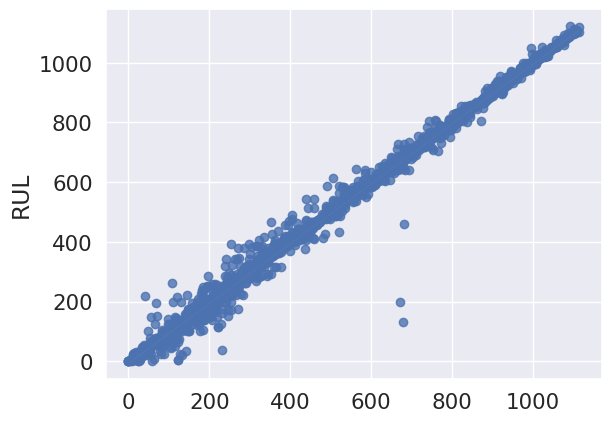

In [ ]:
sns.regplot(x = rfr_pred, y = y_test)

In [ ]:
importance_values = rfr.feature_importances_

for feature_name, importance in zip(df.columns, importance_values):
    print(f"{feature_name}: {importance}")


Cycle_Index: 0.8662972014596457
Discharge Time (s): 0.08660111833633362
Decrement 3.6-3.4V (s): 0.0165921006409066
Max. Voltage Dischar. (V): 0.006205528713246338
Min. Voltage Charg. (V): 0.007507296016210342
Time at 4.15V (s): 0.011440014063268337
Time constant current (s): 0.005356740770388988


The code calculates feature importances using a Random Forest Regressor (rfr.feature_importances_). It iterates over DataFrame columns, printing each column name and its corresponding importance value. This provides insights into the relative importance of features in predicting the target variable.

Text(0.5, 0, 'Random Forest Feature\xa0Importance')

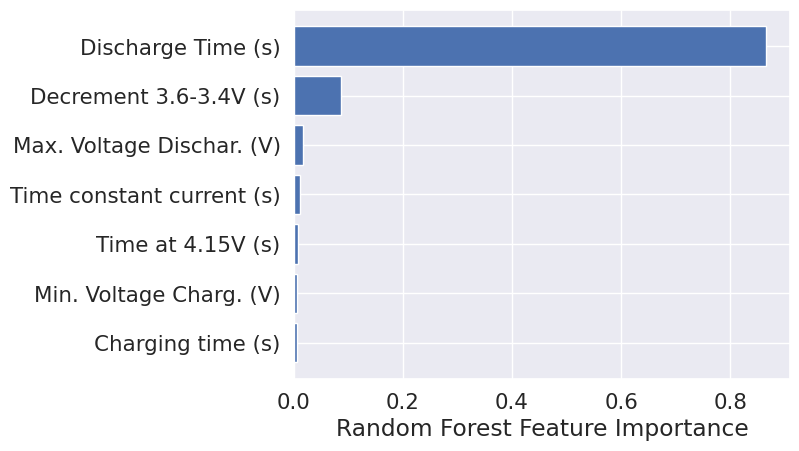

In [ ]:
sorted_idx = rfr.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# **Bagging Regressor**

Bagging Regressor is a machine learning technique used for regression tasks. It's an ensemble method that combines the predictions of multiple individual regressor models. Bagging stands for Bootstrap Aggregating, where each model is trained on a random subset of the training data sampled with replacement. During prediction, the algorithm averages the predictions from all models to make the final prediction. Bagging Regressor helps reduce overfitting and variance by leveraging the diversity of individual models. It's particularly effective for unstable algorithms and can improve the overall performance and robustness of regression models, especially when dealing with noisy data.

In [ ]:
start_time = time.time()

br = BaggingRegressor(random_state=2301)

br.fit(X_train, y_train)
print("Training Score: ",br.score(X_train, y_train))
print("Testing Score: ",br.score(X_test, y_test))

br_pred = br.predict(X_test)
br_rmse = np.sqrt(mean_squared_error(y_test, br_pred))
print("RMSE: ",br_rmse)

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

Training Score:  0.9988627924570438
Testing Score:  0.9942664055284801
RMSE:  24.057302357071208
Execution time:  0.7603158950805664 secs


# **KNN**

KNN is one of the most basic yet essential classification algorithms in machine learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining, and intrusion detection.
It is widely disposable in real-life scenarios since it is non-parametric, meaning it does not make any underlying assumptions about the distribution of data (as opposed to other algorithms such as GMM, which assume a Gaussian distribution of the given data). We are given some prior data (also called training data), which classifies coordinates into groups identified by an attribute.



In [ ]:
start_time = time.time()

knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
knr.fit(X_train, y_train)
print("Training Score: ",knr.score(X_train, y_train))
print("Testing Score: ",knr.score(X_test, y_test))

knr_pred = knr.predict(X_test)
knr_rmse = np.sqrt(mean_squared_error(y_test, knr_pred))
print("RMSE: ",knr_rmse)

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

Training Score:  0.9967541387755393
Testing Score:  0.9908772551981837
RMSE:  30.345633146228298
Execution time:  0.15662884712219238 secs


# **Decision Tree**

A decision tree is a flowchart-like tree structure where each internal node denotes the feature, branches denote the rules and the leaf nodes denote the result of the algorithm. It is a versatile supervised machine-learning algorithm, which is used for both classification and regression problems. It is one of the very powerful algorithms. And it is also used in Random Forest to train on different subsets of training data, which makes random forest one of the most powerful algorithms in machine learning.



In [ ]:
start_time = time.time()

dtr = DecisionTreeRegressor(random_state=2301)
dtr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
print("Training Score: ",dtr.score(X_train, y_train))
print("Testing Score: ",dtr.score(X_test, y_test))

dtr_pred = dtr.predict(X_test)
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_pred))
print("RMSE: ",dtr_rmse)

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

Training Score:  0.9999999068777385
Testing Score:  0.9885531782770145
RMSE:  33.99193594457182
Execution time:  0.2259223461151123 secs


# **Support Vector Machine (SVM)**

Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well it’s best suited for classification. The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible.


In [ ]:
from sklearn.svm import SVR
start_time = time.time()

reg = SVR(kernel = 'rbf')
reg.fit(X_train, y_train)

print("Training Score: ",reg.score(X_train, y_train))
print("Testing Score: ",reg.score(X_test, y_test))

reg_pred = reg.predict(X_test)
reg_rmse = np.sqrt(mean_squared_error(y_test, reg_pred))
print("RMSE: ",reg_rmse)

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

Training Score:  0.900993511578515
Testing Score:  0.8946126885791679
RMSE:  103.14011297404502
Execution time:  21.21595597267151 secs


# **AdaBoost**

AdaBoost is a boosting algorithm that also works on the principle of the stagewise addition method where multiple weak learners are used for getting strong learners. The value of the alpha parameter, in this case, will be indirectly proportional to the error of the weak learner, Unlike Gradient Boosting in XGBoost, the alpha parameter calculated is related to the errors of the weak learner, here the value of the alpha parameter will be indirectly proportional to the error of the weak learner.


In [ ]:
start_time = time.time()

regressor= AdaBoostRegressor(n_estimators=50, learning_rate=0.1, loss='linear', random_state=42)
regressor.fit(X_train,y_train)

print("Training Score: ",regressor.score(X_train, y_train))
print("Testing Score: ",regressor.score(X_test, y_test))

reg_pred = regressor.predict(X_test)
reg_rmse = np.sqrt(mean_squared_error(y_test, reg_pred))
print("RMSE: ",reg_rmse)

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

Training Score:  0.7463219776551095
Testing Score:  0.6082447739783015
RMSE:  0.31218409048756485
Execution time:  0.3021121025085449 secs


# **XGBoost**

XGBoost (Extreme Gradient Boosting) Regressor is a powerful machine learning algorithm used for regression tasks. It's an advanced implementation of gradient boosting, a technique that builds a predictive model by combining the predictions of many weak learners, typically decision trees. XGBoost sequentially builds trees, optimizing a loss function to minimize errors in predictions. It employs a technique called gradient boosting to correct the errors made by previous models, leading to improved performance. XGBoost is known for its speed, scalability, and accuracy, making it a popular choice for regression problems in various domains, including finance, healthcare, and industry.



In [ ]:

start_time = time.time()
reg_mod = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1,
    max_depth=7,
    gamma=0,
)
reg_mod.fit(X_train, y_train)
reg_mod.fit(X_train,y_train)

print("Training Score: ",reg_mod.score(X_train, y_train))
print("Testing Score: ",reg_mod.score(X_test, y_test))

reg_pred = reg_mod.predict(X_test)
reg_rmse = np.sqrt(mean_squared_error(y_test, reg_pred))
print("RMSE: ",reg_rmse)

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

Training Score:  0.9995062240141446
Testing Score:  0.9957766612227511
RMSE:  20.647211198691743
Execution time:  6.220053195953369 secs


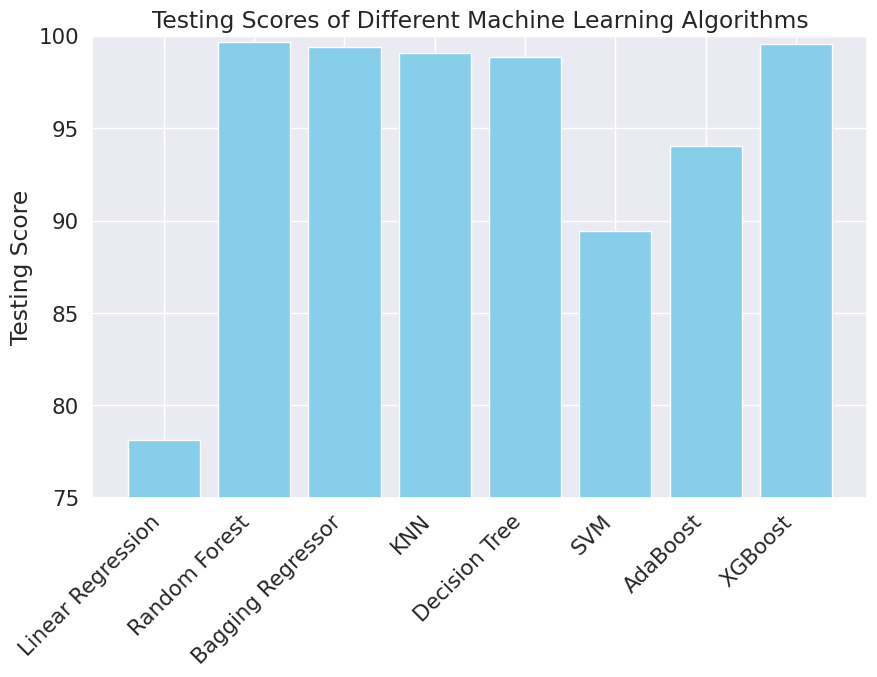

In [ ]:
import matplotlib.pyplot as plt

algorithms = ['Linear Regression', 'Random Forest', 'Bagging Regressor', 'KNN', 'Decision Tree', 'SVM', 'AdaBoost', 'XGBoost']
testing_scores = [78.14, 99.64, 99.42, 99.08, 98.85, 89.46, 94.03, 99.57]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, testing_scores, color='skyblue')
plt.ylabel('Testing Score')
plt.title('Testing Scores of Different Machine Learning Algorithms')
plt.xticks(rotation=45, ha='right')

plt.ylim(75, 100)
plt.show()


# **Conclusion Table**

Random Forest and XGBoost showcase exceptional performance across all metrics, boasting high training and testing scores, low RMSE, and moderate execution times. They significantly outperform simpler algorithms like Linear Regression, KNN, and Decision Tree. Bagging Regressor and AdaBoost offer competitive performance with balanced accuracy and execution times. SVM provides acceptable accuracy but lags in execution speed, potentially limiting its practical applicability.

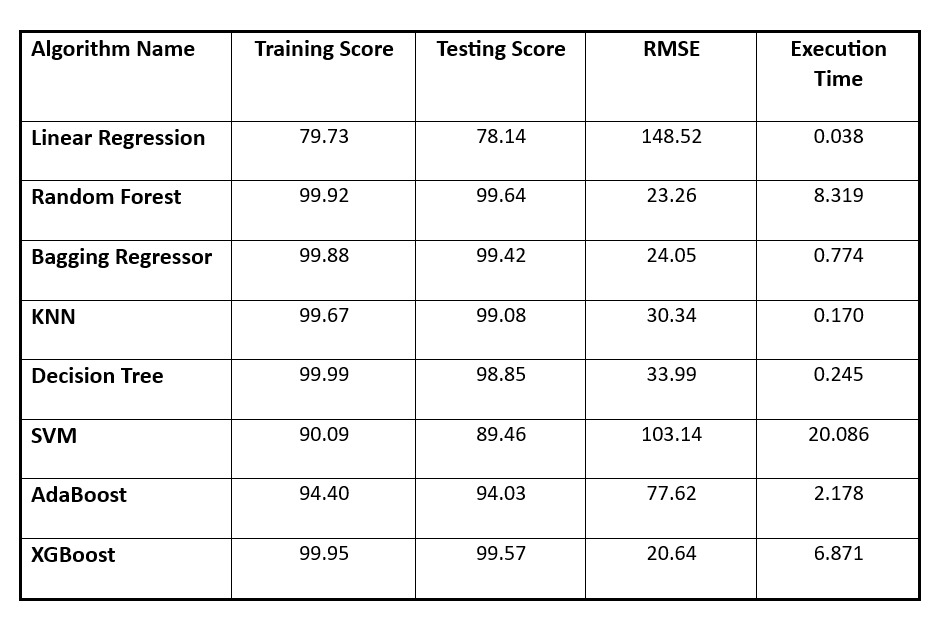